In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg
from Object_detection_features import *
import gym
from gym import wrappers

In [2]:
env = gym.make('Skiing-v0')
# Самая долгая часть. Считается один раз. В конструкторе находятся все классы объектов и фон
odf = ObjectDetectionFeatures(env)

[2017-01-20 16:45:31,153] Making new env: Skiing-v0


In [3]:
# Генерим картинку
image = env.ale.getScreenGrayscale()
# Создаем новый вектор признаков
new_features = odf.get_distance_features(image)

In [4]:
# на i-й позиции списка cl находится яркость пикселя, характерного для i-го класса
cl = list(odf.all_classes)

In [5]:
# Признаки построены следующем образом:
# Для каждой пары классов находятся 2 ближайших объекта (по центрам масс). 
# Далее для каждой такой пары считаются проекции расстояний на x и на y. 
# В первой позиции стоит проекция на х расстояния между ближайшими объектами из нулевого и первого класса и так далее  
new_features

array([  12.0021645 ,  -95.49494949,    3.71428571, -113.18888889,
        -69.57983193,  -75.26143791,   -8.28787879,  -17.69393939,
        -82.28787879,   14.93939394,  -74.        ,   32.63333333])

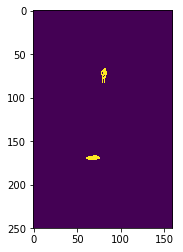

In [6]:
plt.imshow((image[:, :, 0] == cl[0]) | (image[:, :, 0] == cl[1]))
plt.show()

In [7]:
# Генерим картинку
image = env.ale.getScreenGrayscale()
# Делаем упрощение
new_im = odf.get_simple_image(image[:, :, 0])

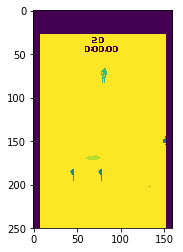

In [8]:
plt.imshow(image[:, :, 0])
plt.show()

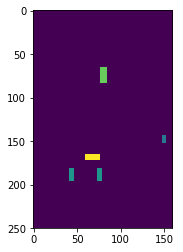

In [9]:
plt.imshow(new_im)
plt.show()